<a href="https://colab.research.google.com/github/vijaykumarharakuni/Deeplearning/blob/main/Image_classification_CNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a cat dog Image Classification using CNN


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Steps
1. load the dataset, visualization
2. Data Preprocessing
3. Create Train set & test set
4. Create CNN Architecture, compile, run , predict

In [ ]:
# load the dataset
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/dl/training_set.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/dl/test_set.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# keras TF libray folder hierarchy

Data
    Training set
       cats   
           cat1.jpg
       dogs
           dog1.jpg
    Test Set
       cats
           cat.11.jpg
       dogs

# visualize the images


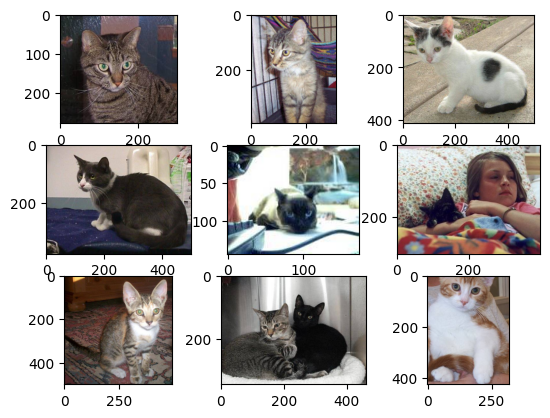

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder='/content/training_set/cats/'

for i in range(9):
  plt.subplot(330+1+i)
  filename=folder+'cat.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()

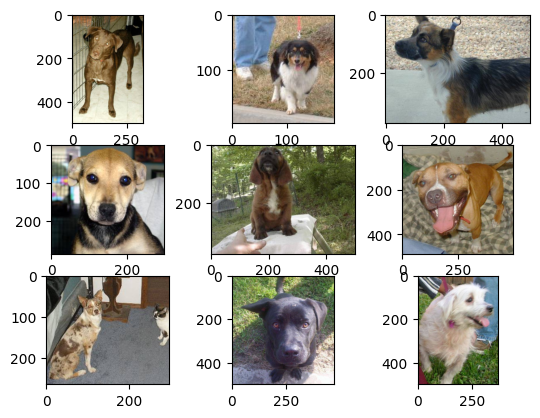

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder='/content/training_set/dogs/'

for i in range(9):
  plt.subplot(330+1+i)
  filename=folder+'dog.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()

# Data Preprocessing- Data Augmentation

In [ ]:
# generate more images by applying some tranformations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)



# create train set & test set

In [ ]:
training_set=train_datagen.flow_from_directory('/content/training_set',
                                               target_size=(64,64),
                                               class_mode='binary',
                                               batch_size=32)

Found 8005 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/test_set',
                                               target_size=(64,64),
                                               class_mode='binary',
                                               batch_size=32)

Found 2023 images belonging to 2 classes.


In [ ]:
# print class labels
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


# Create CNN

In [ ]:
# import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
print('Imported')

Imported


In [ ]:
# create architecture
model=Sequential()
# add first CNN layer
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
# add second CNN layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
# third cnn layer
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
# flatten layer
model.add(Flatten())

# FCN
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
print('model created')

model created


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,090,433 (19.42 MB)

 Trainable params: 5,090,433 (19.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('compiled')

compiled


In [ ]:
history=model.fit(training_set,epochs=5,validation_data=test_set)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step - accuracy: 0.5192 - loss: 0.7247 - val_accuracy: 0.5358 - val_loss: 0.6815
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.5451 - loss: 0.6850 - val_accuracy: 0.5719 - val_loss: 0.6836
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.5729 - loss: 0.6735 - val_accuracy: 0.5769 - val_loss: 0.6798
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.5823 - loss: 0.6725 - val_accuracy: 0.5833 - val_loss: 0.6678
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.6273 - loss: 0.6389 - val_accuracy: 0.6139 - val_loss: 0.6366


In [ ]:
# evaluate the model
score=model.evaluate(test_set)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5901 - loss: 0.6501
Test Loss: 0.6365967988967896
Test Accuracy: 0.6139397025108337


In [ ]:
# evaluate for training
score=model.evaluate(training_set)
print('Train Loss:',score[0])
print('Train Accuracy:',score[1])

251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6475 - loss: 0.6180
Train Loss: 0.6176404356956482
Train Accuracy: 0.6508432030677795


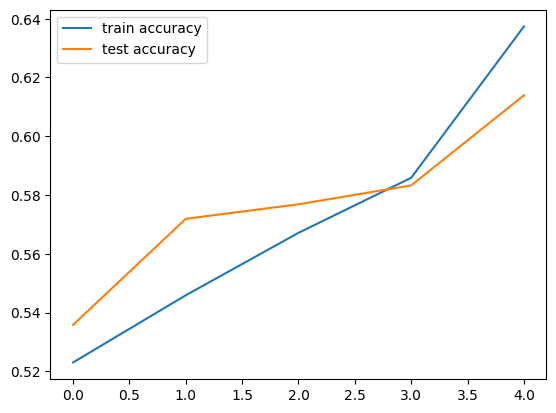

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.show()

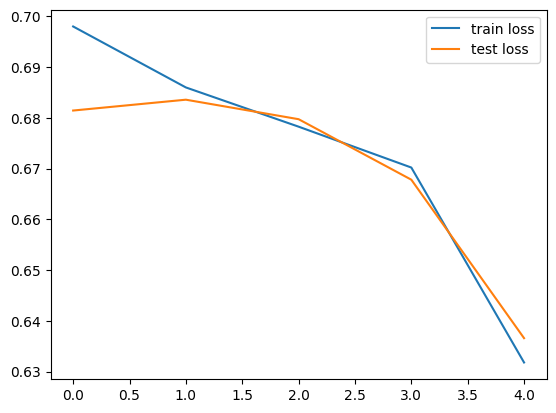

In [ ]:
# plot the losses
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend()
plt.show()



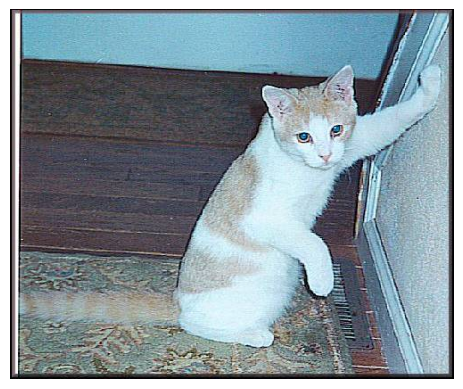

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
[[5.0475764e-22]]
its a cat


In [ ]:
# pred on new data
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

test_image=load_img('/content/test_set/cats/cat.4001.jpg')
plt.imshow(test_image)
plt.axis('off')
plt.show()

test_image=load_img('/content/test_set/cats/cat.4001.jpg',target_size=(64,64))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

if result[0][0]==1:
  print('its a dog')
else:
  print('its a cat')

Challenges---
1. lack of massive dataset
2. Compution power, GPU,

# solution


# Transfer Learning--utilize models are already trained on huge dataset, ImageNet,

# 1. Feature Extraction , training False, FCN for classification

# 2. Fine Tuning---domain specific problem -----retrain the model on domain dataset, freeze intial layers use only last few for retraining.

In [ ]:
# Features Extraction
from tensorflow.keras.applications.vgg16 import VGG16
print('imported')

imported


In [ ]:
vgg_model=VGG16(
    include_top=False,
    weights="imagenet",
    classes=1000,
    name="vgg16",
    input_shape=(64,64,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg_model.trainable=False

In [ ]:
# create arch
model=Sequential()
model.add(vgg_model)

# FCN
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,813,889 (64.14 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('compiled')

compiled


In [ ]:
# training
history=model.fit(training_set,epochs=10,validation_data=test_set)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.6613 - loss: 0.6529 - val_accuracy: 0.7731 - val_loss: 0.4774
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.7295 - loss: 0.5345 - val_accuracy: 0.7696 - val_loss: 0.4686
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.7510 - loss: 0.5011 - val_accuracy: 0.7632 - val_loss: 0.4918
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.7548 - loss: 0.4995 - val_accuracy: 0.7608 - val_loss: 0.4779
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.7593 - loss: 0.4866 - val_accuracy: 0.7741 - val_loss: 0.4590
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.7554 - loss: 0.4859 - val_accuracy: 0.7751 - val_loss: 0.4543
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.7638 - loss: 0.4829 - val_accuracy: 0.7687 - val_loss: 0.4631
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.7878 - loss: 0

In [ ]:
# print test score
score=model.evaluate(test_set)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7666 - loss: 0.4644
Test Loss: 0.4502328634262085
Test Accuracy: 0.7839841842651367


In [ ]:
# train score
score=model.evaluate(training_set)
print('Train Loss:',score[0])
print('Train Accuracy:',score[1])

251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.7961 - loss: 0.4358
Train Loss: 0.43409809470176697
Train Accuracy: 0.7953779101371765


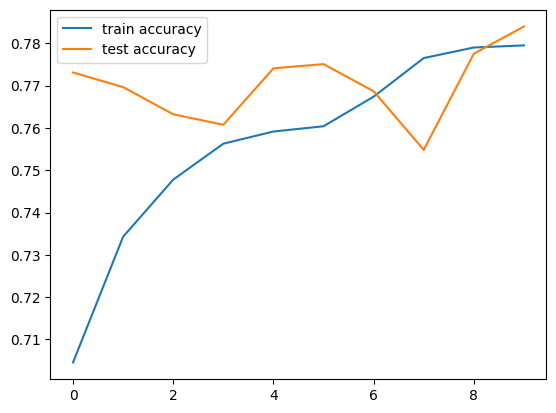

In [ ]:
# plot accuarcy
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.show()